In [12]:
import configparser
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Trying to connect to the database

In [3]:
def create_connection():
    config = configparser.ConfigParser()
    config.read('../kafka_conf/config.ini')
    host = config['mysql']['host']
    user = config['mysql']['user']
    password = config['mysql']['password']
    database = config['mysql']['database']
    try:
        conn = pymysql.connect(
            host=host,
            user=user,
            password=password,
            database=database
        )
        print("Successful Connection")
        cursor = conn.cursor()
        return conn, cursor
    except pymysql.Error as e:
        print("Connection Error:", e)
    return None, None

def get_query_db():
    conn, cursor = create_connection()
    cursor.execute("SELECT * FROM new_happy")
    rows = cursor.fetchall()
    column_names = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    df = pd.DataFrame(rows, columns=column_names)
    return df

The records are extracted from the table and stored in a DataFrame

In [4]:
df_happy = get_query_db()


Successful Connection


In [5]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       729 non-null    int64  
 1   country                  729 non-null    object 
 2   gdp_per_capita           729 non-null    float64
 3   social_support           729 non-null    float64
 4   healthy_life_expectancy  729 non-null    float64
 5   freedom                  729 non-null    float64
 6   happiness_score          729 non-null    float64
 7   happiness_prediction     729 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.7+ KB


In [6]:
df_happy.head()

,id,country,gdp_per_capita,social_support,healthy_life_expectancy,freedom,happiness_score,happiness_prediction
0,1,Kazakhstan,1.22943,0.95544,0.57386,0.40520,5.919,5.69185
1,2,United States,1.39451,1.24711,0.86179,0.54604,7.119,6.72372
2,3,Estonia,1.23700,1.52800,0.87400,0.49500,5.893,6.01419
3,4,Germany,1.34000,1.47400,0.86100,0.58600,6.965,7.03069
4,5,Finland,1.30500,1.59200,0.87400,0.68100,7.632,7.17837


In [7]:
corr, _ = pearsonr(df_happy['happiness_score'], df_happy['happiness_prediction'])
r2 = corr ** 2
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.8381942060748394


Statistical analysis shows that the Pearson correlation between the observed and predicted scores is high, resulting in a coefficient of determination (R-squared) of 0.838, indicating that 83.82% of the variability in the observed happiness score can be explained by the predictive model.

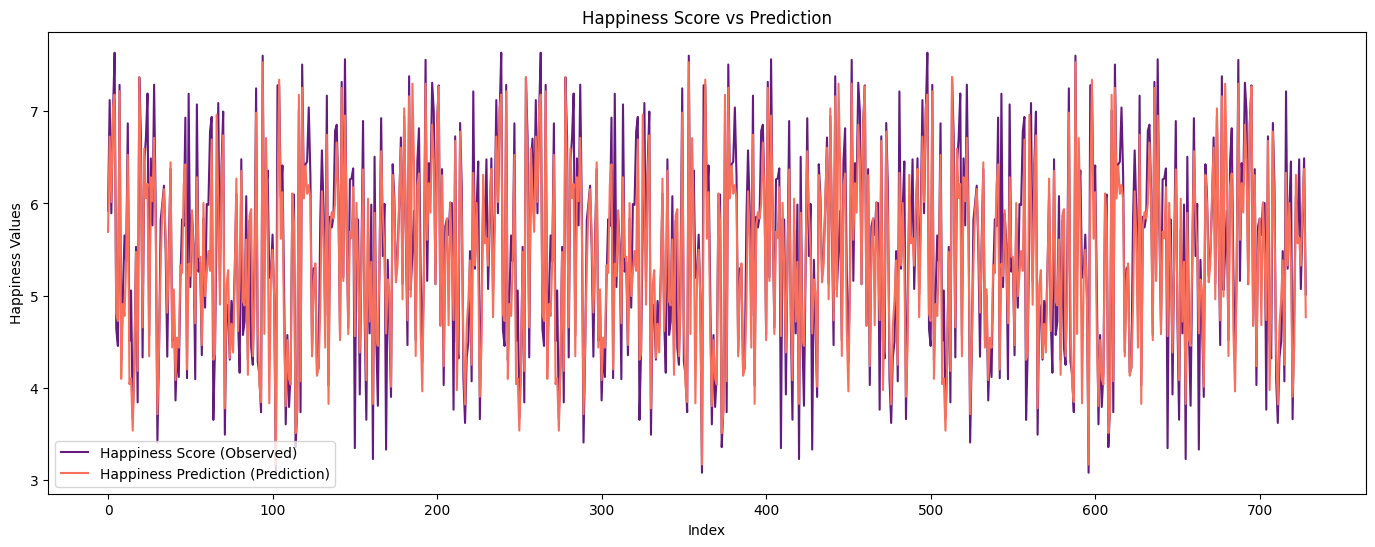

In [11]:
cmap = plt.get_cmap('magma')
colors = [cmap(i) for i in [0.3, 0.7]]
plt.figure(figsize=(17, 6))
plt.plot(df_happy['happiness_score'], label='Happiness Score (Observed)', color=colors[0])
plt.plot(df_happy['happiness_prediction'], label='Happiness Prediction (Prediction)', color=colors[1])
plt.title('Happiness Score vs Prediction')
plt.xlabel('Index')
plt.ylabel('Happiness Values')
plt.legend()
plt.show()